<a href="https://colab.research.google.com/github/shuvad23/image-classification-projects/blob/main/CIFAR_10_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Image Classification with PyTorch

The standard, foundational project for this is classifying images in the **CIFAR-10** dataset.

### Project Goal
To build a Convolutional Neural Network (CNN) model that can correctly classify small color images into one of 10 distinct categories (e.g., airplane, car, bird, cat, dog, etc.).

### Why This is the Best Practice Project

* **Core Concepts:** It covers **data loading**, **preprocessing** (like normalization and transformation into PyTorch Tensors), defining a **CNN architecture**, selecting a **loss function** (like Cross-Entropy Loss), choosing an **optimizer** (like SGD or Adam), and implementing the full **training and evaluation loop**.
* **Built-in Data:** The `torchvision` library makes the CIFAR-10 dataset incredibly easy to download and load, saving you from complex data wrangling.
* **Scalable:** You can start with a simple, small CNN and then easily scale up to practice more advanced techniques like **Transfer Learning** (using a pre-trained model like ResNet or VGG).

### Project Steps Outline

1.  **Setup and Imports:** Import necessary libraries (`torch`, `torch.nn`, `torch.optim`, `torchvision`).
2.  **Data Loading and Preprocessing:**
    * Define **transforms** (e.g., convert image to Tensor, normalize pixel values).
    * Load the **CIFAR-10 training and test datasets** using `torchvision.datasets`.
    * Create **DataLoaders** to efficiently feed data in batches to the model.
3.  **Define the CNN Architecture:**
    * Create a class that inherits from `nn.Module`.
    * Define the layers in the `__init__` method (e.g., `nn.Conv2d`, `nn.MaxPool2d`, `nn.Linear`).
    * Implement the forward pass logic in the `forward` method, typically using a sequence of Convolutional layers, activation functions (like ReLU), Pooling layers, and final fully connected (Linear) layers.
4.  **Define Loss and Optimizer:**
    * Instantiate the **Loss Function** (e.g., `nn.CrossEntropyLoss()`).
    * Instantiate the **Optimizer** (e.g., `optim.SGD` or `optim.Adam`) and pass in the model's parameters.
5.  **Training the Model:**
    * Implement the training loop (looping over epochs).
    * Inside the epoch loop, iterate over the data batches:
        * Get input data and labels.
        * Zero the gradients (`optimizer.zero_grad()`).
        * Perform a **forward pass** to get predictions.
        * Calculate the **loss**.
        * Perform a **backward pass** to compute gradients (`loss.backward()`).
        * Update the weights (`optimizer.step()`).
6.  **Evaluation:**
    * Test the trained model on the held-out test dataset to calculate the final **accuracy**.

***

## Next Steps for Advanced Practice

Once you've mastered simple classification, here are three excellent progression projects:

### 1. Transfer Learning on a Custom Dataset
* **Concept:** Instead of building a CNN from scratch, you load a pre-trained, state-of-the-art model (like **ResNet-50** or **VGG-16** from `torchvision.models`) that was trained on a massive dataset (like ImageNet).
* **Practice:** You learn to **"freeze"** the weights of the initial layers and only retrain the final classification layer for your specific, custom dataset (e.g., classifying dog breeds, types of flowers, or even your own photo collection). This is the most common real-world practice.

### 2. Object Detection 🎯
* **Concept:** This goes beyond classification by also drawing a **bounding box** around objects and identifying their class within the image.
* **Practice:** Use PyTorch's built-in models from **TorchVision** (like **Faster R-CNN** or **YOLOv5** if you look for external PyTorch implementations) and fine-tune them on a detection dataset like **Pascal VOC** or a smaller custom one. This introduces you to complex output formats (bounding box coordinates, class labels) and specialized loss functions.

### 3. Image Segmentation (U-Net) 🖼️
* **Concept:** This is **pixel-level classification**, where you assign a label to *every single pixel* in the image (e.g., is this pixel "road," "car," or "sky").
* **Practice:** Implement a **U-Net** architecture and train it on a medical or street scene segmentation dataset. This teaches you about upsampling, encoder-decoder architectures, and working with complex 2D mask outputs.

In [ ]:
# !pip install torch torchvision torchaudio
! pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


Looking in indexes: https://download.pytorch.org/whl/cu121


1. Setup and Imports

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Set device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on device: {device}")

Running on device: cuda
True


2. Load and Preprocess Data (CIFAR-10)
- The CIFAR-10 dataset has 10 classes of 32x32 color images. We need to define transformations to convert the images into PyTorch Tensors and normalize them.

In [ ]:
#define the transformations
transform = transforms.Compose(
    [transforms.ToTensor(),# Converts a PIL Image or numpy.ndarray to a Tensor
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))] # Normalize to range [-1, 1]
    )
batch_size = 4
#load training data
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True,num_workers=2)

#load test data
testset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False,num_workers=2)
#define the 10 classes
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

print("Data successfully loaded and prepared")

Data successfully loaded and prepared


2.1. Visualize a Batch of Training Images
- Let's see what these CIFAR-10 images look like!

Here are some example images from the CIFAR-10 dataset:


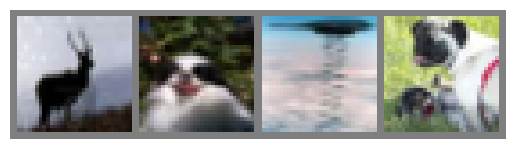

deer  dog   plane dog  


In [ ]:
# Function to show images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off') # Hide axes
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
print('Here are some example images from the CIFAR-10 dataset:')
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

3. Define the Convolutional Neural Network (CNN)
- We'll define a simple CNN architecture consisting of two convolutional layers, two pooling layers, and three fully connected (linear) layers.

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # 1st Convolutional Layer
        # Input: 3 color channels (RGB)
        # Output: 6 feature maps
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6,kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2,stride=2) # max pooling

        # 2nd Convolutional Layer
        # Input: 6 feature maps from previous layer
        # Output: 16 feature maps
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16,kernel_size=5)

        # Fully Connected Layers (Input size calculated: 16 * 5 * 5 = 400)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)# 10 output classes for CIFAR-10
    def forward(self,x):
        # -> Convolution -> ReLU -> Pooling
        x = self.pool(nn.functional.relu(self.conv1(x)))
        # -> Convolution -> ReLU -> Pooling
        x = self.pool(nn.functional.relu(self.conv2(x)))

        # Flatten the feature maps for the fully connected layers
        x = torch.flatten(x, 1) # flatten all dimensions except batch

        # -> Fully Connected -> ReLU
        x = nn.functional.relu(self.fc1(x))
        # -> Fully Connected -> ReLU
        x = nn.functional.relu(self.fc2(x))
        # Final Fully Connected (Output Logits)
        x = self.fc3(x)
        return x

# Instantiate the model and move it to the device (CPU/GPU)
net = SimpleCNN().to(device)
print("CNN model successfully defined and moved to device")

CNN model successfully defined and moved to device


4. Define Loss Function and Optimizer
- We use Cross-Entropy Loss for multi-class classification and the Stochastic Gradient Descent (SGD) optimizer.

In [ ]:
# Loss function for classification problems
criterion = nn.CrossEntropyLoss()

# Optimizer (SGD is a good starting point)
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum = 0.9)

5. Training the Model
- We will train the model for 20 epochs

In [ ]:
print("Starting Training...")
num_epochs = 20 # Use 10-20 epochs for better results

for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass + backward pass + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Starting Training...
[1,  2000] loss: 2.215
[1,  4000] loss: 1.912
[1,  6000] loss: 1.667
[1,  8000] loss: 1.561
[1, 10000] loss: 1.502
[1, 12000] loss: 1.478
[2,  2000] loss: 1.390
[2,  4000] loss: 1.362
[2,  6000] loss: 1.325
[2,  8000] loss: 1.311
[2, 10000] loss: 1.304
[2, 12000] loss: 1.243
[3,  2000] loss: 1.210
[3,  4000] loss: 1.188
[3,  6000] loss: 1.193
[3,  8000] loss: 1.168
[3, 10000] loss: 1.176
[3, 12000] loss: 1.164
[4,  2000] loss: 1.098
[4,  4000] loss: 1.084
[4,  6000] loss: 1.098
[4,  8000] loss: 1.078
[4, 10000] loss: 1.118
[4, 12000] loss: 1.099
[5,  2000] loss: 1.001
[5,  4000] loss: 1.017
[5,  6000] loss: 1.024
[5,  8000] loss: 1.034
[5, 10000] loss: 1.047
[5, 12000] loss: 1.019
[6,  2000] loss: 0.948
[6,  4000] loss: 0.948
[6,  6000] loss: 0.973
[6,  8000] loss: 0.971
[6, 10000] loss: 0.979
[6, 12000] loss: 0.980
[7,  2000] loss: 0.893
[7,  4000] loss: 0.914
[7,  6000] loss: 0.943
[7,  8000] loss: 0.922
[7, 10000] loss: 0.927
[7, 12000] loss: 0.939
[8,  2000] lo

6. Evaluation and Accuracy Check (same as before)

In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = net(images)
    # Get the predicted class (the one with the highest energy/score)
    _, predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct +=(predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total:2f} %')


Accuracy of the network on the 10000 test images: 60.000000 %


7. Per-Class Accuracy (Optional)
- You can check how well the model performed on each of the 10 classes.

In [ ]:
# Check accuracy for each class
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(batch_size):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    accuracy = 100 * class_correct[i] / class_total[i]
    print(f'Accuracy of {classes[i]:5s} : {accuracy:.2f} %')

Accuracy of plane : 64.00 %
Accuracy of car   : 77.00 %
Accuracy of bird  : 42.40 %
Accuracy of cat   : 46.00 %
Accuracy of deer  : 53.50 %
Accuracy of dog   : 36.80 %
Accuracy of frog  : 75.60 %
Accuracy of horse : 68.40 %
Accuracy of ship  : 76.90 %
Accuracy of truck : 66.70 %


8. Visualize Model Predictions
- Now, let's take a batch of images from the test set, pass them through our trained network, and see what the model predicts versus the actual labels.


Visualizing model predictions on a batch of test images:


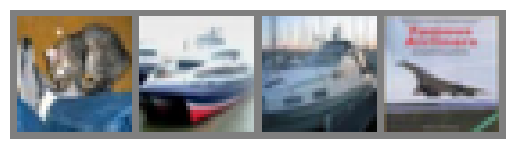

GroundTruth:  cat   ship  ship  plane
Predicted:    cat   ship  plane plane


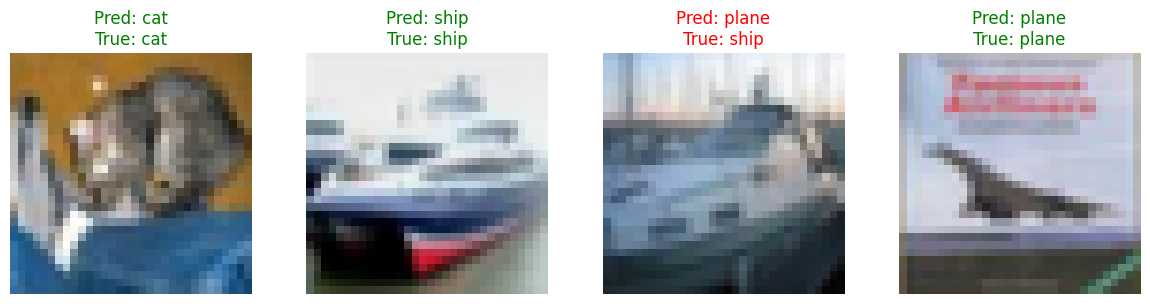

In [ ]:
print("\nVisualizing model predictions on a batch of test images:")

# Get some random test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Move images to the device for prediction
images = images.to(device)

# Make predictions
outputs = net(images)

# Get predicted classes
_, predicted = torch.max(outputs, 1)

print('Predicted:   ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(batch_size)))

# Create a more detailed visualization with predictions and ground truth
fig, axes = plt.subplots(1, batch_size, figsize=(12, 3))
for i in range(batch_size):
    ax = axes[i]
    # Unnormalize the image for display
    img = images[i] / 2 + 0.5
    npimg = img.cpu().numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.set_title(f"Pred: {classes[predicted[i]]}\nTrue: {classes[labels[i]]}",
                 color=("green" if predicted[i] == labels[i] else "red"))
    ax.axis('off')
plt.tight_layout()
plt.show()